In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('phones.csv',error_bad_lines=False)
df.head()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1316562494.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('phones.csv',error_bad_lines=False)
Skipping line 821: expected 40 fields, saw 41
Skipping line 6060: expected 40 fields, saw 41
Skipping line 6663: expected 40 fields, saw 41



,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,...,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,...,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,N/A,NaN,NaN,NaN,No,No,2016 April,...,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,...,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...


In [3]:
df.shape
# 8628 rows and 40 columns

(8628, 40)

In [4]:
# Column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               8628 non-null   object 
 1   model               8628 non-null   object 
 2   network_technology  8628 non-null   object 
 3   2G_bands            8628 non-null   object 
 4   3G_bands            4856 non-null   object 
 5   4G_bands            1603 non-null   object 
 6   network_speed       4883 non-null   object 
 7   GPRS                8596 non-null   object 
 8   EDGE                8605 non-null   object 
 9   announced           8613 non-null   object 
 10  status              8628 non-null   object 
 11  dimentions          8609 non-null   object 
 12  weight_g            7679 non-null   object 
 13  weight_oz           7679 non-null   object 
 14  SIM                 8627 non-null   object 
 15  display_type        8624 non-null   object 
 16  displa

In [5]:
df['memory_card'].unique()

array(['microSD  up to 128 GB (dedicated slot)',
       'microSD  up to 256 GB (uses SIM 2 slot)', 'microSD  up to 256 GB',
       'microSD  up to 256 GB (dedicated slot)',
       'microSD  up to 32 GB (dedicated slot)',
       'microSD (dedicated slot)',
       'microSD  up to 32 GB (uses SIM 2 slot)',
       'microSD  up to 64 GB (dedicated slot)', 'No',
       'microSD  up to 32 GB (dedicated slot)  2 GB included',
       'microSD  up to 32 GB (dedicated slot)  8 GB included',
       'microSD  up to 8 GB (dedicated slot)', 'microSD  up to 32 GB',
       'microSD  up to 32/256 GB (dedicated slot)',
       'microSD  up to 256 GB (dedicated slot) - single-SIM model',
       'To be confirmed',
       'microSD  up to 32 GB (dedicated slot) - single-SIM model',
       'microSD  up to 16 GB (dedicated slot)',
       'microSD  up to 4 GB (dedicated slot)',
       'microSD  up to 2 GB (dedicated slot)',
       'microSD  up to 16 GB (dedicated slot)  2 GB included',
       'microSD  up to 8 G

In [6]:
cols = ['brand','model','GPRS','EDGE','status','SIM','display_type','display_resolution','OS','CPU','Chipset','GPU','memory_card',
        'internal_memory','RAM','primary_camera','secondary_camera','loud_speaker','audio_jack','WLAN','bluetooth','GPS','NFC','radio','USB',
        'sensors','battery','colors','approx_price_EUR']

In [7]:
df1 = df[cols]
df1.head()

,brand,model,GPRS,EDGE,status,SIM,display_type,display_resolution,OS,CPU,...,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR
0,Acer,Iconia Talk S,Yes,Yes,Available. Released 2016 October,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,...,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0
1,Acer,Liquid Z6 Plus,Yes,Yes,Available. Released 2016 December,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,...,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0
2,Acer,Liquid Z6,Yes,Yes,Available. Released 2016 December,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,...,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0
3,Acer,Iconia Tab 10 A3-A40,No,No,Available. Released 2016 June,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,...,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0
4,Acer,Liquid X2,Yes,Yes,Available. Released 2016 February,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,...,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0


In [8]:
df1.isnull().sum()   # No. of Null values in each column

brand                    0
model                    0
GPRS                    32
EDGE                    23
status                   0
SIM                      1
display_type             4
display_resolution    1214
OS                    3723
CPU                   3794
Chipset               4938
GPU                   5136
memory_card              0
internal_memory       1822
RAM                   3972
primary_camera        1192
secondary_camera      1223
loud_speaker             0
audio_jack              68
WLAN                     4
bluetooth               19
GPS                     29
NFC                   7836
radio                   94
USB                    903
sensors               4040
battery                  2
colors                 602
approx_price_EUR      3625
dtype: int64

In [9]:
df.duplicated().sum()  # No duplicate rows

0

In [10]:
# Making copy of DataFrame1
df2 = df1.copy()

In [11]:
# Extracting output column from DataFrame
outcol = df2.iloc[:,-1]
outcol

0       170.0
1       250.0
2       120.0
3       230.0
4       230.0
        ...  
8623      NaN
8624      NaN
8625      NaN
8626      NaN
8627      NaN
Name: approx_price_EUR, Length: 8628, dtype: float64

In [12]:
# Dividing the dataframe into 3 sub dataframes
subdf1 = df2.iloc[:,0:10]
subdf2 = df2.iloc[:,10:20]
subdf3 = df2.iloc[:,20:30]

In [13]:
subdf1.head()

,brand,model,GPRS,EDGE,status,SIM,display_type,display_resolution,OS,CPU
0,Acer,Iconia Talk S,Yes,Yes,Available. Released 2016 October,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53
1,Acer,Liquid Z6 Plus,Yes,Yes,Available. Released 2016 December,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53
2,Acer,Liquid Z6,Yes,Yes,Available. Released 2016 December,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53
3,Acer,Iconia Tab 10 A3-A40,No,No,Available. Released 2016 June,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53
4,Acer,Liquid X2,Yes,Yes,Available. Released 2016 February,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53


In [14]:
subdf2.head()

,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN
0,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot
1,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot
2,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes
3,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot
4,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot


In [15]:
subdf3.head()

,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR
0,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0
1,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0
2,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0
3,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0
4,4.0| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold,230.0


In [16]:
df3 = df2.copy()

In [17]:
df3['colors'].value_counts()

Black                                                 2023
Black| White                                           726
Silver                                                 337
White                                                  174
White| Black                                           135
                                                      ... 
Black/Gold| White/Gold                                   1
Black/Gold| White/Gold| Black/Silver| White/Silver       1
Black| White| Gray| Red| Yellow                          1
Pure Black| Black/Gold| White/Gold                       1
Pearl Star White                                         1
Name: colors, Length: 2612, dtype: int64

In [18]:
# Columns that need preprocessing
pre_cols = ['GPRS','EDGE','status','display_resolution','internal_memory','RAM','primary_camera','secondary_camera','loud_speaker',
            'audio_jack','WLAN','bluetooth','GPS','radio','sensors','battery','colors']

In [19]:
df4 = df3[pre_cols]
df4.head()

,GPRS,EDGE,status,display_resolution,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
0,Yes,Yes,Available. Released 2016 October,7.0 inches (~69.8% screen-to-body ratio),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,FM radio,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black
1,Yes,Yes,Available. Released 2016 December,5.5 inches (~71.7% screen-to-body ratio),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,FM radio,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White
2,Yes,Yes,Available. Released 2016 December,5.0 inches,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,FM radio,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White
3,No,No,Available. Released 2016 June,10.1 inches (~68.4% screen-to-body ratio),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,No,Accelerometer,Non-removable Li-Ion battery,Black
4,Yes,Yes,Available. Released 2016 February,5.5 inches (~69.0% screen-to-body ratio),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP| LE,Yes with A-GPS,FM radio,Accelerometer| proximity| compass,Removable Li-Po 4020 mAh battery,Black| Gold


In [20]:
df4.shape

(8628, 17)

In [21]:
def gprs(obj):
  obj1 = str(obj)
  if obj1 == 'Yes' or obj1 == 'Class 10' or obj1 == 'No' or obj1 == 'Class 12' or obj1 == 'Class 8' :
    obj1 = obj1
  else:
    obj1 = 'Yes'
  return str(obj1)



In [22]:
# GPRS
df4['GPRS'] = df4['GPRS'].apply(gprs)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1066315553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['GPRS'] = df4['GPRS'].apply(gprs)


In [23]:
df4['GPRS'].value_counts()

Yes         4053
Class 10    2165
No          1199
Class 12     999
Class 8      212
Name: GPRS, dtype: int64

In [24]:
def edge(obj):
  obj1 = str(obj)
  if obj1 == 'Yes' or obj1 == 'Class 10' or obj1 == 'No' or obj1 == 'Class 12' or obj1 == 'Class 10' :
    obj1 = obj1
  else:
    obj1 = 'Yes'
  return str(obj1)


In [25]:
# EDGE
df4['EDGE'] = df4['EDGE'].apply(edge)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1663873015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['EDGE'] = df4['EDGE'].apply(edge)


In [26]:
df4['EDGE'].value_counts()

Yes         3729
No          3238
Class 10     966
Class 12     695
Name: EDGE, dtype: int64

In [27]:
# status
df4 ['status'] = df4['status'].apply(lambda x: x.split()[0])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\416476236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4 ['status'] = df4['status'].apply(lambda x: x.split()[0])


In [28]:
df4['status'].value_counts()

Available.      4469
Discontinued    3636
Available        275
Cancelled        219
Coming            29
Name: status, dtype: int64

In [29]:
# display_resolution
df4['display_resolution'].unique()

array(['7.0 inches (~69.8% screen-to-body ratio)',
       '5.5 inches (~71.7% screen-to-body ratio)', '5.0 inches', ...,
       '7.0 inches (~61.7% screen-to-body ratio)',
       '7.0 inches (~56.0% screen-to-body ratio)',
       '2.5 inches (~29.7% screen-to-body ratio)'], dtype=object)

In [30]:
df4['display_resolution'] = df4['display_resolution'].apply(lambda x: str(x).split('(')[0].split()[0])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\192514054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['display_resolution'] = df4['display_resolution'].apply(lambda x: str(x).split('(')[0].split()[0])


In [31]:
df4['display_resolution'].value_counts()

nan     1214
5.0      898
4.0      472
5.5      441
2.0      438
        ... 
1.81       1
2.13       1
1.87       1
2.28       1
4.99       1
Name: display_resolution, Length: 184, dtype: int64

In [32]:
df4['RAM'].isnull().sum()

3972

In [33]:
def ram(obj):
  obj1 = str(obj)
  obj1 = obj1.split('|')[0].split('RAM')[0]
  try:
    obj1 = obj1.split('/')[1]
  except IndexError:
    obj1 = obj1
  return obj1.strip()

In [34]:
def processmb(obj):
  obj1 = str(obj)
  sub1 = 'MB'
  sub2 = 'Mb'
  sub3 = 'kB'
  if sub1 in obj1:
    obj1 = 'L1GB'
  elif sub2 in obj1:
    obj1 = 'L1GB'
  elif sub3 in obj1:
    obj1 = 'L1GB'
  else:
    obj1 = obj1  
  return str(obj1).strip()  



In [35]:
df4['RAM'] = df4['RAM'].apply(ram).apply(processmb)
df4['RAM'] = df4['RAM'].replace(['GB', '3', '4GB','1 GB ROM', 'Cricket)', '16 GB 1.5 GB', '256', '2 GB or 3 GB',
       '1 GB or 1.5 GB', '32 GB (Titanium)','256 GB','256 KB'], 
       ['nan', 'nan','4 GB','nan','nan','1.5 GB','nan','3 GB','1.5 GB','32 GB','nan','nan'])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2034827163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['RAM'] = df4['RAM'].apply(ram).apply(processmb)
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2034827163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['RAM'] = df4['RAM'].replace(['GB', '3', '4GB','1 GB ROM', 'Cricket)', '16 GB 1.5 GB', '256', '2 GB or 3 GB',


In [36]:
df4['RAM'].value_counts()

nan                  3987
L1GB                 1890
1 GB                 1485
2 GB                  689
3 GB                  302
4 GB                  168
1.5 GB                 85
6 GB                   20
16 GB (SEA model)       1
32 GB                   1
Name: RAM, dtype: int64

In [37]:
def intmemory(obj):
  obj1 = str(obj)
  obj1 = obj1.split('(')[0].split('/')[-1]
  return obj1

In [38]:
def intmemory1(obj):
  obj1 = str(obj)
  if 'GB' not in obj1:
    obj1 = 'L1GB'
  return obj1

In [39]:
df4['internal_memory'] = df4['internal_memory'].apply(intmemory).apply(intmemory1)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1164161349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['internal_memory'] = df4['internal_memory'].apply(intmemory).apply(intmemory1)


In [40]:
df4['internal_memory'].value_counts()

L1GB                     4802
8 GB                      932
4 GB                      904
16 GB                     902
32 GB                     457
64 GB                     238
2 GB                       68
4 GB                       66
1 GB                       61
128 GB                     57
8 GB                       26
16 GB                      24
1 GB ROM                   14
256 GB                      8
1.6 GB                      7
1 GB                        7
1.5 GB                      6
3 GB                        6
32 GB                       4
1.1 GB                      4
8 GB ROM                    3
4 GB ROM                    2
512 GB                      2
11 GB                       2
2.9 GB                      2
2 GB                        2
 32 GB                      2
256 MB ROM| 2 GB            1
20 GB                       1
3 GB                        1
1.7 GB                      1
3 GB internal               1
1.4 GB                      1
 4 GB     

In [41]:
def extract_mp(obj):
    obj1 = str(obj).split('|')
    for i in obj1:
        return str(i.split(',')[0])

In [42]:
df4['secondary_camera'] = df4['secondary_camera'].apply(extract_mp)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\791983093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['secondary_camera'] = df4['secondary_camera'].apply(extract_mp)


In [43]:
df4['secondary_camera'].value_counts()

No                                 3263
nan                                1223
VGA                                 855
5 MP                                785
2 MP                                765
                                   ... 
5 MP (Stylus 3) / 8 MP (Stylo 3       1
5 or 8 MP                             1
5 MP (f/2.4) or 8 MP                  1
1.3 MP/ VGA                           1
VGA/ 1 MP (market dependant)          1
Name: secondary_camera, Length: 75, dtype: int64

In [44]:
df4['loud_speaker'] = df4['loud_speaker'].apply(lambda x: x.split()[0])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2108916746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['loud_speaker'] = df4['loud_speaker'].apply(lambda x: x.split()[0])


In [45]:
df4['audio_jack'] = df4['audio_jack'].replace(['No| included adaptor for 3.5mm','nO'],['No','No'])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\3576353585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['audio_jack'] = df4['audio_jack'].replace(['No| included adaptor for 3.5mm','nO'],['No','No'])


In [46]:
df4['WLAN'].apply(lambda x: str(x).split()[0]).value_counts()

Wi-Fi       4456
No          3825
Yes          250
Yes|          92
nan            4
Optional       1
Name: WLAN, dtype: int64

In [47]:
df4['WLAN'] = df4['WLAN'].apply(lambda x: str(x).split()[0])
df4['WLAN'] = df4['WLAN'].replace(['Wi-Fi','Yes|','Optional'],['Yes','Yes','nan'])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\571746344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['WLAN'] = df4['WLAN'].apply(lambda x: str(x).split()[0])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\571746344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['WLAN'] = df4['WLAN'].replace(['Wi-Fi','Yes|','Optional'],['Yes','Yes','nan'])


In [48]:
df4['WLAN'].value_counts()

Yes    4798
No     3825
nan       5
Name: WLAN, dtype: int64

In [49]:
def blt(obj):
  obj1 = str(obj)
  l1 = ['4.0','No','2.0','2.1','Yes','3.0','4.1','1.2','4.2','1.1','nan']
  if obj1 not in l1:
    obj1 = 'Yes'
  return obj1

In [50]:
df4['bluetooth'] = df4['bluetooth'].apply(lambda x: str(x).split('|')[0].strip()).apply(blt)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\3827394821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bluetooth'] = df4['bluetooth'].apply(lambda x: str(x).split('|')[0].strip()).apply(blt)


In [51]:
df4['bluetooth'].value_counts()

4.0    2088
No     1612
2.0    1165
2.1    1145
Yes     954
3.0     662
4.1     340
1.2     311
4.2     183
1.1     149
nan      19
Name: bluetooth, dtype: int64

In [52]:
df4['GPS'] = df4['GPS'].apply(lambda x: str(x).split()[0])
df4['GPS'] = df4['GPS'].replace(['A-GPS','Yes;','To','TBD','Np','AT&T','E911'],['Yes','Yes','Yes','Yes','Yes','Yes','Yes'])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1985751203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['GPS'] = df4['GPS'].apply(lambda x: str(x).split()[0])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1985751203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['GPS'] = df4['GPS'].replace(['A-GPS','Yes;','To','TBD','Np','AT&T','E911'],['Yes','Yes','Yes','Yes','Yes','Yes','Yes'])


In [53]:
df4['GPS'].value_counts()

Yes    4514
No     4085
nan      29
Name: GPS, dtype: int64

In [54]:
df4['radio'] = df4['radio'].apply(lambda x: 'Yes' if x !='No' else 'No' )

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1490991373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['radio'] = df4['radio'].apply(lambda x: 'Yes' if x !='No' else 'No' )


In [55]:
df4['radio'].value_counts()

Yes    5138
No     3490
Name: radio, dtype: int64

In [56]:
df4['sensors'] = df4['sensors'].apply(lambda x: str(x).split('|'))
df4['sensors'] = df4['sensors'].apply(lambda x: len(x))

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\3003372101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['sensors'] = df4['sensors'].apply(lambda x: str(x).split('|'))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\3003372101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['sensors'] = df4['sensors'].apply(lambda x: len(x))


In [57]:
df4['sensors'].value_counts()

1     4961
2     1323
3     1322
4      628
5      288
6       53
8       33
7       12
9        5
10       3
Name: sensors, dtype: int64

In [58]:
def extbattery(obj):
    try:
        obj = str(obj)
        obj1 = [int(i) for i in obj.split() if i.isdigit()]
        return obj1[0]
    except IndexError:
        return np.NaN

In [59]:
df4['battery'] = df4['battery'].apply(extbattery)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\1285304919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['battery'] = df4['battery'].apply(extbattery)


In [60]:
df4['battery'].value_counts()

1000.0    469
2000.0    401
1500.0    392
800.0     372
3000.0    263
         ... 
5124.0      1
2640.0      1
2710.0      1
450.0       1
2480.0      1
Name: battery, Length: 370, dtype: int64

In [61]:
df4['colors'].value_counts()

Black                                                 2023
Black| White                                           726
Silver                                                 337
White                                                  174
White| Black                                           135
                                                      ... 
Black/Gold| White/Gold                                   1
Black/Gold| White/Gold| Black/Silver| White/Silver       1
Black| White| Gray| Red| Yellow                          1
Pure Black| Black/Gold| White/Gold                       1
Pearl Star White                                         1
Name: colors, Length: 2612, dtype: int64

In [62]:
def mk_lst(obj):
    obj1 = str(obj).split('|')
    return list(obj1)

In [63]:
df4['colors'] = df4['colors'].apply(mk_lst)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\659743078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['colors'] = df4['colors'].apply(mk_lst)


In [64]:
df4 = df4.explode('colors').reset_index(drop=True)

In [65]:
df4['primary_camera'] = df4['primary_camera'].apply(lambda x: str(x).split('|')[0])

In [66]:
df4['primary_camera'].unique()

array(['13 MP', '8 MP', '5 MP', '21 MP', '2 MP', 'VGA', '3.15 MP',
       '3 MP or 5 MP', 'Yes', 'Dual 13 MP', '16 MP', 'nan',
       '2 MP or 5 MP', '5 MP or 8 MP or 13 MP', '5 MP or 8 MP',
       '2 MP /LED flash (optional)', '1.3 MP', '13.1 MP', '3 MP',
       '5 MP (7040D)5 MP', '5 MP (4033A',
       '2 MP (EU) or 3.2 MP (Americas)', '12 MP', 'CIF',
       'Dual 13 MP + 5 MP', '24 MP', 'QVGA', 'Dual 12 MP', '0.7 MP',
       'Dual 13 MP + 2MP', '20.7 MP', '13.4 MP', '23 MP', '8 MP or 13 MP',
       '5 MP or 2 MP', '1 MP', '1.2 MP', '18 MP', '2 MP. LED flash',
       '3.2 MP', '3.15MP', '2.1 MP', 'Dual 16 MP + 8 MP',
       'Dual 12 MP + 13 MP', 'Dual 13 MP + 5MP', '12.3 MP', '0.9 MP',
       '20 MP', '20.2 MP Duo', 'Dual 20MP + 2.1MP', 'Dual 4 MP', '4 MP',
       'Dual 13 MP + 2 MP', 'Dual 20MP + 12 MP', 'Dual 12 + 8 MP',
       'Dual 20 MP + 12 MP', 'Dual 20 MP +12 MP', 'Dual 12 MP + 2 MP',
       'Dual 8 MP', '3.15 MP (Casio-Hitachi module)', '0.3 MP', '5MP',
       '10 MP', '2MP'

In [67]:
df4.head()

,GPRS,EDGE,status,display_resolution,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
0,Yes,Yes,Available.,7.0,32 GB,2 GB,13 MP,2 MP,Yes,Yes,Yes,4.0,Yes,Yes,2,3400.0,Black
1,Yes,Yes,Available.,5.5,32 GB,3 GB,13 MP,5 MP,Yes,Yes,Yes,4.0,Yes,Yes,3,4080.0,Black
2,Yes,Yes,Available.,5.5,32 GB,3 GB,13 MP,5 MP,Yes,Yes,Yes,4.0,Yes,Yes,3,4080.0,White
3,Yes,Yes,Available.,5.0,8 GB,1 GB,8 MP,2 MP,Yes,Yes,Yes,Yes,Yes,Yes,2,2000.0,Black
4,Yes,Yes,Available.,5.0,8 GB,1 GB,8 MP,2 MP,Yes,Yes,Yes,Yes,Yes,Yes,2,2000.0,White


In [68]:
df5 = df1.drop(pre_cols,axis=1)

In [69]:
df5.head()

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,USB,approx_price_EUR
0,Acer,Iconia Talk S,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),NaN,microUSB 2.0,170.0
1,Acer,Liquid Z6 Plus,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),NaN,microUSB 2.0,250.0
2,Acer,Liquid Z6,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,NaN,microUSB 2.0,120.0
3,Acer,Iconia Tab 10 A3-A40,No,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),NaN,microUSB 2.0,230.0
4,Acer,Liquid X2,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),NaN,microUSB 2.0,230.0


In [70]:
df5 = df5.join(df4)

In [71]:
df5.head()

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
0,Acer,Iconia Talk S,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),NaN,...,2 MP,Yes,Yes,Yes,4.0,Yes,Yes,2,3400.0,Black
1,Acer,Liquid Z6 Plus,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),NaN,...,5 MP,Yes,Yes,Yes,4.0,Yes,Yes,3,4080.0,Black
2,Acer,Liquid Z6,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,NaN,...,5 MP,Yes,Yes,Yes,4.0,Yes,Yes,3,4080.0,White
3,Acer,Iconia Tab 10 A3-A40,No,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),NaN,...,2 MP,Yes,Yes,Yes,Yes,Yes,Yes,2,2000.0,Black
4,Acer,Liquid X2,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),NaN,...,2 MP,Yes,Yes,Yes,Yes,Yes,Yes,2,2000.0,White


In [72]:
df6 = df5.copy()

In [73]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               8628 non-null   object 
 1   model               8628 non-null   object 
 2   SIM                 8627 non-null   object 
 3   display_type        8624 non-null   object 
 4   OS                  4905 non-null   object 
 5   CPU                 4834 non-null   object 
 6   Chipset             3690 non-null   object 
 7   GPU                 3492 non-null   object 
 8   memory_card         8628 non-null   object 
 9   NFC                 792 non-null    object 
 10  USB                 7725 non-null   object 
 11  approx_price_EUR    5003 non-null   float64
 12  GPRS                8628 non-null   object 
 13  EDGE                8628 non-null   object 
 14  status              8628 non-null   object 
 15  display_resolution  8628 non-null   object 
 16  intern

In [74]:
df7 = df6.copy()

In [75]:
df8 = df7.copy()

In [76]:
df8.describe()

,approx_price_EUR,sensors,battery
count,5003.000000,8628.000000,8002.000000
mean,202.236458,2.142443,1931.130592
std,600.183478,1.312084,1251.601764
min,10.000000,1.000000,15.000000
25%,80.000000,1.000000,1000.000000
50%,130.000000,2.000000,1700.000000
75%,220.000000,3.000000,2500.000000
max,27000.000000,7.000000,11560.000000


C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2373822255.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['approx_price_EUR'])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2373822255.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['sensors'])
C:\Users\Samsung\AppData\Lo

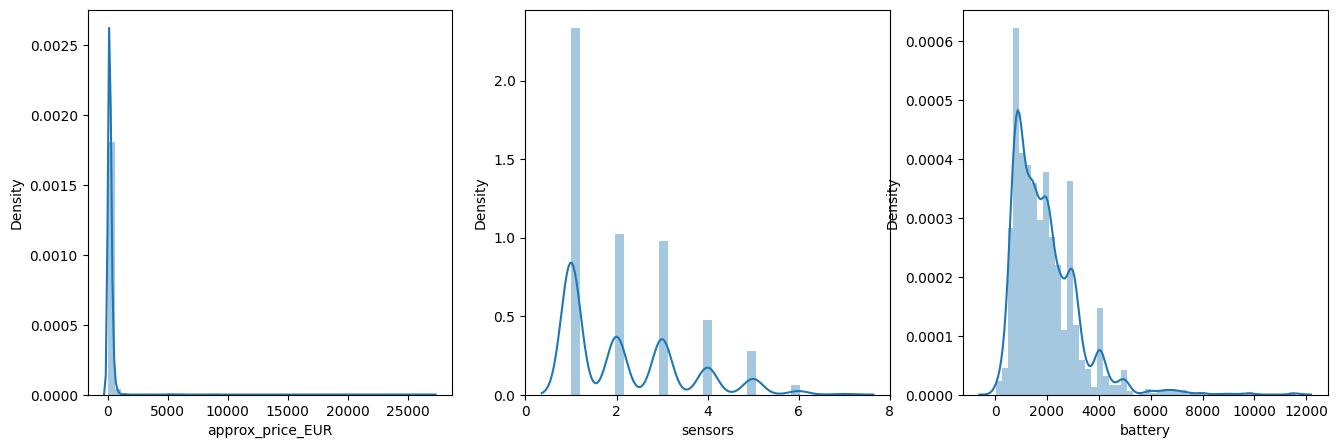

In [77]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df8['approx_price_EUR'])

plt.subplot(1,3,2)
sns.distplot(df8['sensors'])

plt.subplot(1,3,3)
sns.distplot(df8['battery'])

plt.show()

In [78]:
df8['approx_price_EUR'].skew() # Highly right skewed

25.87222520511991

In [79]:
df8['sensors'].skew() # Moderately skewed

0.988857569705067

In [80]:
df8['battery'].skew() # right skewed

2.036599718405094

In [81]:
# data is skewed so we will use IQR Box plot approach to handle outliers

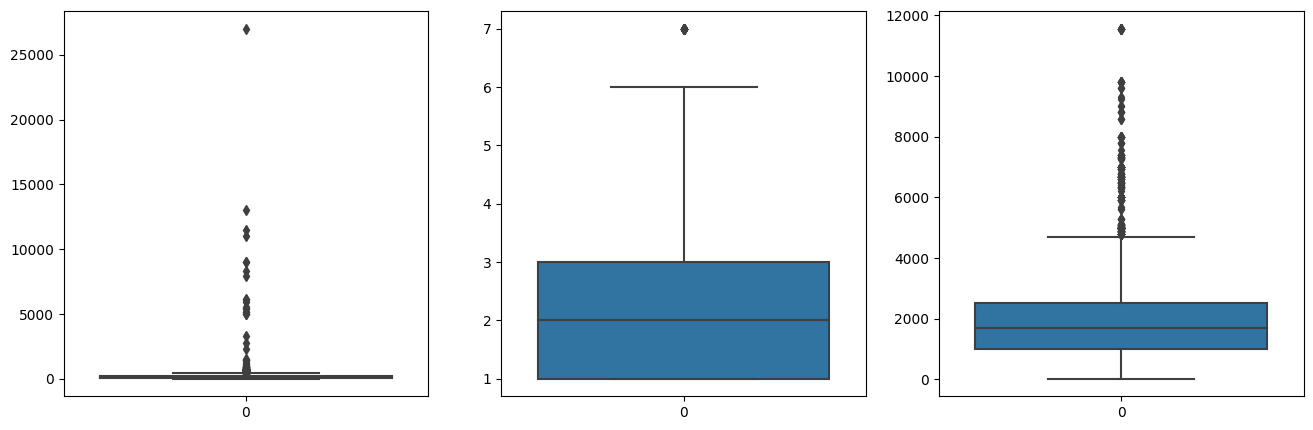

In [82]:
# Outlier Detection (IQR Box plot)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(df8['approx_price_EUR'])

plt.subplot(1,3,2)
sns.boxplot(df8['sensors'])

plt.subplot(1,3,3)
sns.boxplot(df8['battery'])

plt.show()

In [83]:
# There are huge no. of outliers in 'approx_price_EUR' and 'battery' 
# There are a very few outlier in sensor column

In [84]:
# So we will apply 'capping' technique on 'approx_price_EUR' and 'battery'
# and apply 'trimming' on sensors

In [85]:
df8.describe()

,approx_price_EUR,sensors,battery
count,5003.000000,8628.000000,8002.000000
mean,202.236458,2.142443,1931.130592
std,600.183478,1.312084,1251.601764
min,10.000000,1.000000,15.000000
25%,80.000000,1.000000,1000.000000
50%,130.000000,2.000000,1700.000000
75%,220.000000,3.000000,2500.000000
max,27000.000000,7.000000,11560.000000


In [86]:
#      approx_price_EUR	 sensors	    battery
# 25%	 80.000000	       1.000000	  1000.000000    # 25th percentile
# 75%	 220.000000	       3.000000	  2500.000000    # 75th percentile

In [87]:
iqr1 = 220.00 - 80.00   # for approx_price_EUR
iqr2 = 3.00 - 1.00      # for sensors
iqr3 = 2500.00 - 1000.00 # for battery

In [88]:
upper_limit1 = 220.00 + 1.5 * iqr1 # upper limit for approx_price_EUR(Above this limit all values will be considerd as an outlier in this col)
lower_limit1 = 80.00 - 1.5 * iqr1  # lower limit for approx_price_EUR(Below this limit all values will be considerd as an outlier in this col)

upper_limit2 = 3.00 + 1.5 * iqr2 # upper limit for sensors(Above this limit all values will be considerd as an outlier in this col)
lower_limit2 = 1.00 - 1.5 * iqr2  # lower limit for sensors(Below this limit all values will be considerd as an outlier in this col)

upper_limit3 = 2500.00 + 1.5 * iqr3 # upper limit for battery(Above this limit all values will be considerd as an outlier in this col)
lower_limit3 = 1000.00 - 1.5 * iqr3  # lower limit for battery(Below this limit all values will be considerd as an outlier in this col)

In [89]:
print("Upper limit1",upper_limit1)
print("Lower limit1",lower_limit1)
print("Upper limit2",upper_limit2)
print("Lower limit2",lower_limit2)
print("Upper limit3",upper_limit3)
print("Lower limit3",lower_limit3)

Upper limit1 430.0
Lower limit1 -130.0
Upper limit2 6.0
Lower limit2 -2.0
Upper limit3 4750.0
Lower limit3 -1250.0


In [90]:
df8[df8['approx_price_EUR'] > upper_limit1]
# These all records are upper limit outliers in approx_price_EUR (242 outliers)

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
71,Acer,Iconia Tab A501,Mini-SIM,LCD capacitive touchscreen 256K colors,Android 3.0 (Honeycomb)| upgradable to 3.2 (Ho...,Dual-core 1.0 GHz Cortex-A9,Nvidia Tegra 2 T20,ULP GeForce,microSD up to 32 GB (dedicated slot),NaN,...,Yes,Yes,Yes,Yes,Yes,No,No,1,3700.0,Red
114,alcatel,Idol 4s Windows,Nano-SIM,AMOLED capacitive touchscreen 16M colors,Microsoft Windows 10,Quad-core (2x2.15 GHz Kryo & 2x1.6 GHz Kryo),Qualcomm MSM8996 Snapdragon 820,Adreno 530,microSD up to 256 GB (dedicated slot),NaN,...,HD,Yes,Yes,Yes,4.0,Yes,Yes,3,1460.0,Black
171,alcatel,Hero 2,Micro-SIM,IPS LCD capacitive touchscreen 16M colors,Android 4.4.2 (KitKat),Octa-core 2.0 GHz Cortex-A7,Mediatek MT8392,Mali-450MP4,microSD up to 32 GB (dedicated slot),Yes,...,No,Yes,No,Yes,2.0,Yes,Yes,1,1260.0,Black
232,alcatel,One Touch Scribe X,Micro-SIM,TFT capacitive touchscreen 16M colors,Android 4.1 (Jelly Bean),Quad-core 1.2 GHz Cortex-A7,Mediatek MT6589,PowerVR SGX544,microSD up to 32 GB (dedicated slot),NaN,...,nan,Yes,No,No,4.0,No,No,5,210.0,White
479,Allview,X3 Soul Pro,Dual SIM (Micro-SIM/Nano-SIM| dual stand-by),AMOLED capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Octa-core (4x2.0 GHz Cortex-A53 & 4x1.0 GHz Co...,Mediatek MT6755 Helio P10,Mali-T860MP2,microSD up to 256 GB (uses SIM 2 slot),NaN,...,No,Yes,Yes,Yes,No,No,No,1,3000.0,Black/Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,ZTE,Axon 7s,Dual SIM (Nano-SIM| dual stand-by),AMOLED capacitive touchscreen 16M colors,Android 7.0 (Nougat),Quad-core (2x2.35 GHz Kryo & 2x1.6 GHz Kryo),Qualcomm MSM8996 Snapdragon 821,Adreno 530,microSD up to 256 GB (uses SIM 2 slot),Yes,...,No,Yes,No,No,No,No,Yes,1,940.0,lustrous silver
8424,ZTE,Axon 7 Max,Dual SIM (Nano-SIM| dual stand-by),IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Octa-core 2.0 GHz Cortex-A53,Qualcomm MSM8953 Snapdragon 625,Adreno 506,microSD up to 256 GB (uses SIM 2 slot),NaN,...,No,Yes,No,No,Yes,No,No,1,850.0,Black
8434,ZTE,nubia Z11,Dual SIM (Nano-SIM| dual stand-by),IPS LCD capacitive touchscreen 16M colors,Android 6.0.1 (Marshmallow),Quad-core (2x2.15 GHz Kryo & 2x1.6 GHz Kryo),Qualcomm MSM8996 Snapdragon 820,Adreno 530,microSD up to 256 GB (uses SIM 2 slot),Yes,...,No,Yes,No,No,No,No,Yes,1,940.0,Black
8460,ZTE,Axon Lux,Dual SIM (Nano-SIM| dual stand-by),IPS LCD capacitive touchscreen 16M colors,Android 5.0.2 (Lollipop),Octa-core (4x1.5 GHz Cortex-A53 & 4x2.0 GHz Co...,Qualcomm MSM8994 Snapdragon 810,Adreno 430,microSD up to 256 GB (uses SIM 2 slot),Yes,...,No,Yes,No,No,2.0,No,No,1,770.0,Dark Pearl Gray


In [91]:
df8[df8['approx_price_EUR'] < lower_limit1]
# No lower limit outliers in approx_price_EUR

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors


In [92]:
df8[df8['sensors'] > upper_limit2]
# These all records are upper limit outliers in sensors (19 outliers)

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
5874,Sagem,my511X,Mini-SIM,TFT 65K colors,NaN,NaN,NaN,NaN,microSD (dedicated slot),NaN,...,8 MP,Yes,Yes,Yes,4.1,Yes,Yes,7,3100.0,Ceramic White
5875,Sagem,my501X,Mini-SIM,TFT 256K colors,NaN,NaN,NaN,NaN,miniSD,NaN,...,8 MP,Yes,Yes,Yes,4.1,Yes,Yes,7,3100.0,Titanium Black
5912,Sagem,MY C5-2,Mini-SIM,CSTN 65K colors,NaN,NaN,NaN,NaN,No,NaN,...,8 MP,Yes,Yes,Yes,4.1,Yes,No,7,3100.0,Titanium Black
5913,Sagem,MY X1-2,Mini-SIM,Monochrome graphics,NaN,NaN,NaN,NaN,No,NaN,...,8 MP,Yes,Yes,Yes,4.1,Yes,No,7,3100.0,Ceramic White
6240,Samsung,Ativ Tab P8510,No,PLS TFT capacitive touchscreen 16M colors,Microsoft Windows RT,Dual-core 1.5 GHz Krait,Qualcomm APQ8090A,Adreno 305,microSD up to 64 GB (dedicated slot),Yes,...,8 MP,Yes,Yes,Yes,4.2,Yes,Yes,7,2800.0,Silver
6241,Samsung,Comment 2 R390C,Mini-SIM,TFT 256K colors,NaN,NaN,NaN,NaN,microSD up to 32 GB (dedicated slot),NaN,...,8 MP,Yes,Yes,Yes,4.2,Yes,Yes,7,2800.0,Titan
6242,Samsung,I8190 Galaxy S III mini,Mini-SIM,Super AMOLED capacitive touchscreen 16M colors,Android 4.1 (Jelly Bean),1.0 GHz dual-core Cortex-A9,NovaThor U8420,Mali-400,microSD up to 32 GB (dedicated slot),Yes (Market dependent),...,8 MP,Yes,Yes,Yes,4.2,Yes,Yes,7,2800.0,Gold
6243,Samsung,Galaxy Music S6010,Mini-SIM,TFT capacitive touchscreen 256K colors,Android 4.0.4 (Ice Cream Sandwich)| upgradable...,850 MHz Cortex-A9,NaN,NaN,microSD up to 32 GB (dedicated slot),NaN,...,8 MP,Yes,Yes,Yes,4.2,Yes,Yes,7,2800.0,Silver
6244,Samsung,Galaxy Music Duos S6012,Dual SIM (Mini-SIM),TFT capacitive touchscreen 256K colors,Android 4.0.4 (Ice Cream Sandwich)| planned up...,850 MHz Cortex-A9,NaN,NaN,microSD up to 32 GB (dedicated slot),NaN,...,8 MP,Yes,Yes,Yes,4.2,Yes,Yes,7,2800.0,Titan
6245,Samsung,Galaxy Rugby Pro I547,Mini-SIM,Super AMOLED capacitive touchscreen 16M colors,Android 4.0.4 (Ice Cream Sandwich),Dual-core 1.5 GHz Krait,Qualcomm MSM8960 Snapdragon S4 Plus,Adreno 305,microSD up to 32 GB (dedicated slot),Yes,...,8 MP,Yes,Yes,Yes,4.2,Yes,Yes,7,2800.0,Gold


In [93]:
df8[df8['sensors'] < lower_limit2]
# No lower limit outliers in sensors

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors


In [94]:
df8[df8['battery'] > upper_limit3]
# These all records are upper limit outliers in battery (249 outliers)

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
9,Acer,Liquid Jade Primo,Dual SIM (Nano-SIM| dual stand-by),AMOLED capacitive touchscreen 16M colors,Microsoft Windows 10,Hexa-core (4x1.4 GHz Cortex-A53 & 2x1.8 GHz Co...,Qualcomm MSM8992 Snapdragon 808,Adreno 418,microSD up to 256 GB (uses SIM 2 slot),NaN,...,5 MP,Yes,Yes,Yes,Yes,Yes,Yes,3,5000.0,Blue
10,Acer,Liquid Z330,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 5.1 (Lollipop),Quad-core 1.1 GHz Cortex-A7,Qualcomm MSM8909 Snapdragon 210,Adreno 304,microSD (dedicated slot),NaN,...,5 MP,Yes,Yes,Yes,Yes,Yes,Yes,3,5000.0,White
29,Acer,Liquid X1,Micro-SIM,IPS LCD capacitive touchscreen 16M colors,Android 4.4.2 (KitKat),Octa-core 1.7 GHz Cortex-A7,Mediatek MT6592,Mali-450MP4,microSD up to 32 GB (dedicated slot),NaN,...,2 MP,Yes,Yes,Yes,4.0,Yes,No,1,5910.0,Various
31,Acer,Liquid E700,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,Android 4.4.2 (KitKat),Quad-core 1.2 GHz Cortex-A7,Mediatek MT6582,Mali-400MP2,microSD up to 32 GB (dedicated slot),NaN,...,2 MP,Yes,Yes,Yes,4.0,Yes,No,1,5910.0,Black
32,Acer,Liquid E600,Micro-SIM,IPS LCD capacitive touchscreen 16M colors,Android 4.4.2 (KitKat),Quad-core 1.2 GHz Cortex-A7,Qualcomm MSM8926 Snapdragon 400,Adreno 305,microSD up to 32 GB (dedicated slot),NaN,...,2 MP,Yes,Yes,Yes,4.0,Yes,No,1,5910.0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,Vodafone,Smart ultra 6,Nano-SIM,IPS LCD capacitive touchscreen 16M colors,Android 5.1 (Lollipop),Octa-core (4x1.5 GHz Cortex-A53 & 4x1.0 GHz Co...,Qualcomm MSM8939 Snapdragon 615,Adreno 405,microSD up to 64 GB (dedicated slot),NaN,...,5 MP,Yes,Yes,Yes,4.1,Yes,Yes,4,5000.0,Iron Gray
8068,Vodafone,Tab Prime 6,Micro-SIM,IPS LCD capacitive touchscreen 16M colors,Android 5.0 (Lollipop),Quad-core 1.3 GHz Cortex-A53,Qualcomm MSM8916 Snapdragon 410,Adreno 306,microSD up to 32 GB (dedicated slot),NaN,...,5 MP,Yes,Yes,Yes,4.1,Yes,Yes,4,5000.0,Fine Gold
8252,XOLO,Omega 5.0,Dual SIM,IPS LCD capacitive touchscreen 16M colors,Android 4.4.2 (KitKat),Octa-core 1.4 GHz Cortex-A7,Mediatek MT6592M,Mali-450MP4,microSD up to 32 GB,NaN,...,1.3 MP,Yes,Yes,Yes,2.1,Yes,No,4,7000.0,Black
8260,XOLO,Q510s,Dual SIM,IPS LCD capacitive touchscreen 256K colors,Android 4.4.2 (KitKat),Quad-core 1.3 GHz Cortex-A7,Mediatek MT6582M,Mali-400MP2,microSD up to 32 GB,NaN,...,1.3 MP,Yes,Yes,Yes,2.1,Yes,No,4,7000.0,Black


In [95]:
df8[df8['battery'] < lower_limit3]
# No lower limit outliers in battery

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors


In [96]:
# There are 242 otliers in approx_price_EUR col
# There are 19 outliers in sensors col
# There are 249 outliers in battery col

In [97]:
# Outlier Handling

In [98]:
# Trimming on sensors
new_df2 = df8[df8['sensors'] <= upper_limit2]

In [99]:
new_df2.shape

(8609, 29)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2951229277.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['sensors'])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2951229277.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['sensors'])


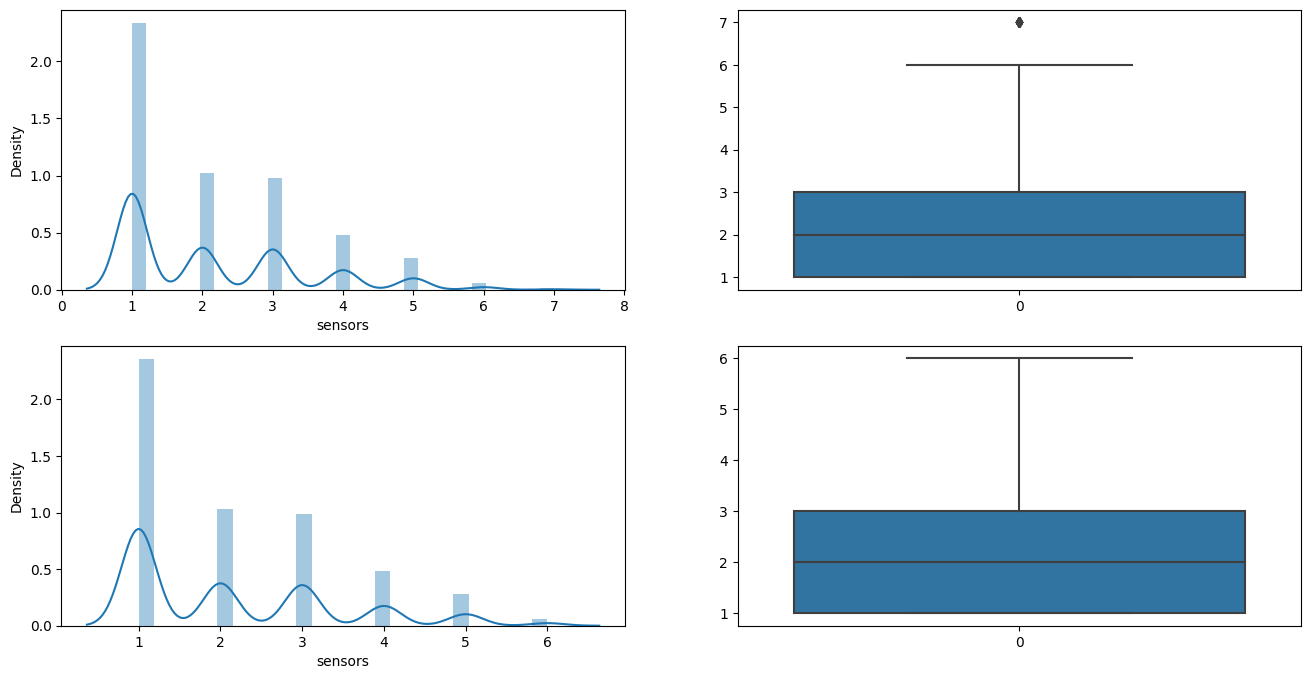

In [100]:
# Comparing (Before and after outlier removal)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df8['sensors'])

plt.subplot(2,2,2)
sns.boxplot(df8['sensors'])

plt.subplot(2,2,3)
sns.distplot(new_df2['sensors'])

plt.subplot(2,2,4)
sns.boxplot(new_df2['sensors'])

plt.show()

In [101]:
# Applying capping on approx_price_EUR

new_df2['approx_price_EUR'] = np.where(
    new_df2['approx_price_EUR'] > upper_limit1,  # (if Condition 1 then)
    upper_limit1,                                       # upper limit
    np.where(                                                
        new_df2['approx_price_EUR'] < lower_limit1,  # elif(Condition 2 then)
        lower_limit1,                                       # lower limit(Actually there is no lower limit outliers)
        new_df2['approx_price_EUR']                 # else the same value
    )
)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\570695413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['approx_price_EUR'] = np.where(


In [102]:
# Applying capping on battery
new_df2['battery'] = np.where(
    new_df2['battery'] > upper_limit3,  # (if Condition 1 then)
    upper_limit3,                                       # upper limit
    np.where(                                                
        new_df2['battery'] < lower_limit3,  # elif(Condition 2 then)
        lower_limit3,                                       # lower limit(Actually there is no lower limit outliers)
        new_df2['battery']                 # else the same value
    )
)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2968586784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['battery'] = np.where(


C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\3949582706.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['approx_price_EUR'])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\3949582706.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['approx_price_EUR'])


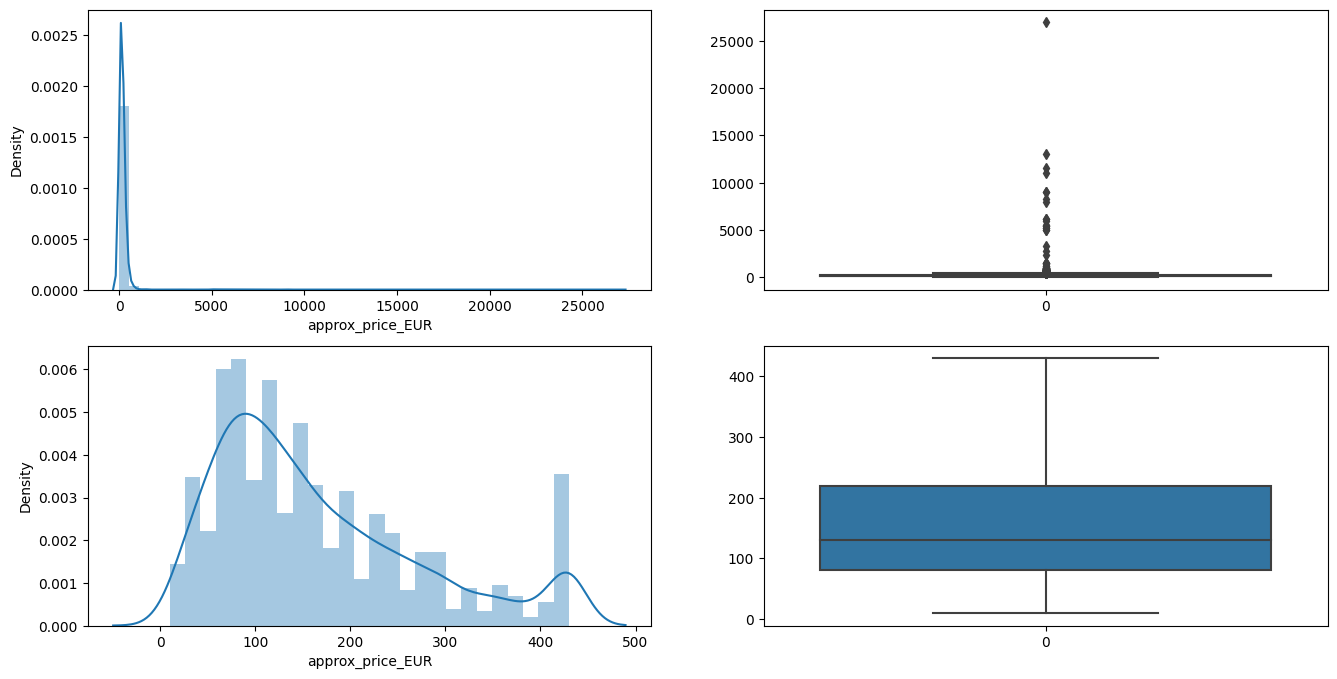

In [103]:
# Comparing (Before and after applying Capping) on approx_price_EUR

plt.figure(figsize=(16,8))
plt.subplot(2,2,1) # 2 row 2 column 1st position 
sns.distplot(df8['approx_price_EUR'])

plt.subplot(2,2,2) # 2 row 2 column 2nd position 
sns.boxplot(df8['approx_price_EUR'])

plt.subplot(2,2,3) # 2 row 2 column 3rd position 
sns.distplot(new_df2['approx_price_EUR'])

plt.subplot(2,2,4) # 2 row 2 column 4th position
sns.boxplot(new_df2['approx_price_EUR'])

plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2279475371.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['battery'])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_7376\2279475371.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['battery'])


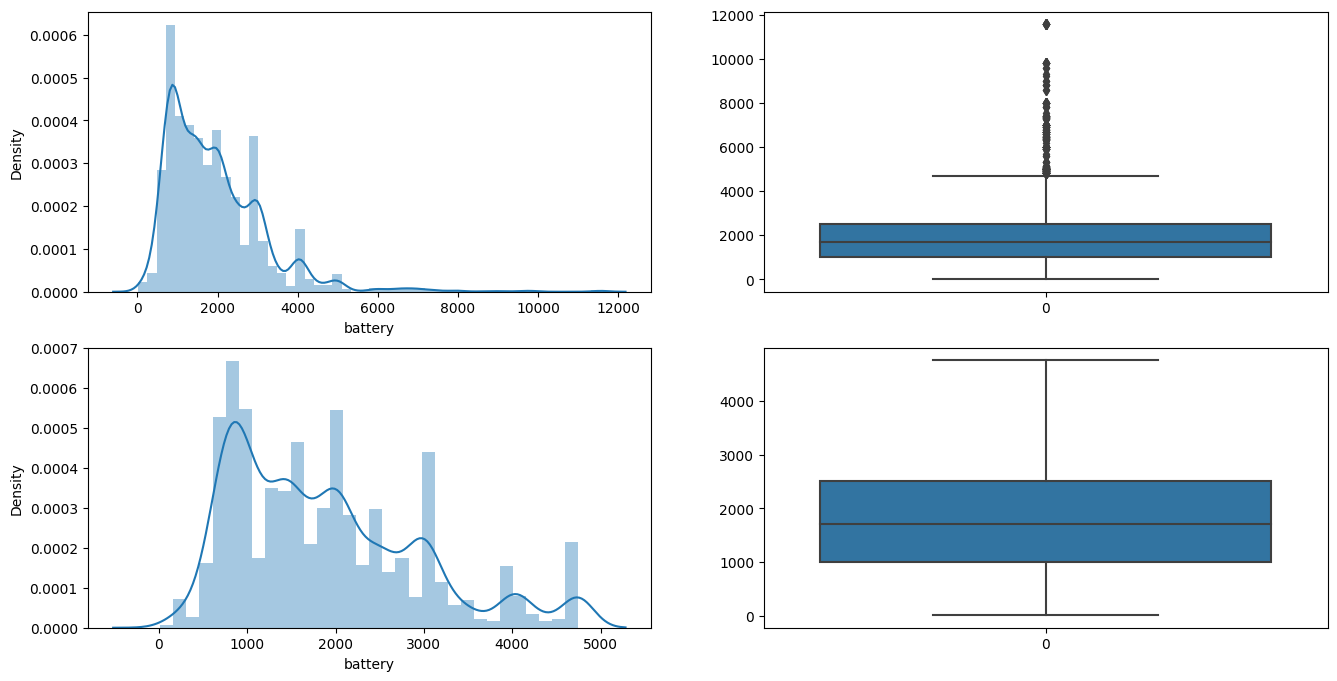

In [104]:
# Comparing (Before and after applying Capping) on battery

plt.figure(figsize=(16,8))
plt.subplot(2,2,1) # 2 row 2 column 1st position 
sns.distplot(df8['battery'])

plt.subplot(2,2,2) # 2 row 2 column 2nd position 
sns.boxplot(df8['battery'])

plt.subplot(2,2,3) # 2 row 2 column 3rd position 
sns.distplot(new_df2['battery'])

plt.subplot(2,2,4) # 2 row 2 column 4th position
sns.boxplot(new_df2['battery'])

plt.show()

In [105]:
new_df3 = new_df2.copy()

In [106]:
cols = new_df3.columns
cols = np.array(cols)
cols

array(['brand', 'model', 'SIM', 'display_type', 'OS', 'CPU', 'Chipset',
       'GPU', 'memory_card', 'NFC', 'USB', 'approx_price_EUR', 'GPRS',
       'EDGE', 'status', 'display_resolution', 'internal_memory', 'RAM',
       'primary_camera', 'secondary_camera', 'loud_speaker', 'audio_jack',
       'WLAN', 'bluetooth', 'GPS', 'radio', 'sensors', 'battery',
       'colors'], dtype=object)

In [107]:
imputer1 = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer1 = imputer1.fit(new_df3[cols])
new_df3[cols] = imputer1.transform(new_df3[cols])
new_df3.head()

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
0,Acer,Iconia Talk S,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),Yes,...,2 MP,Yes,Yes,Yes,4.0,Yes,Yes,2,3400.0,Black
1,Acer,Liquid Z6 Plus,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),Yes,...,5 MP,Yes,Yes,Yes,4.0,Yes,Yes,3,4080.0,Black
2,Acer,Liquid Z6,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,Yes,...,5 MP,Yes,Yes,Yes,4.0,Yes,Yes,3,4080.0,White
3,Acer,Iconia Tab 10 A3-A40,No,IPS LCD capacitive touchscreen 16M colors,Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),Yes,...,2 MP,Yes,Yes,Yes,Yes,Yes,Yes,2,2000.0,Black
4,Acer,Liquid X2,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),Yes,...,2 MP,Yes,Yes,Yes,Yes,Yes,Yes,2,2000.0,White


In [108]:
new_df3.isnull().sum()

brand                 0
model                 0
SIM                   0
display_type          0
OS                    0
CPU                   0
Chipset               0
GPU                   0
memory_card           0
NFC                   0
USB                   0
approx_price_EUR      0
GPRS                  0
EDGE                  0
status                0
display_resolution    0
internal_memory       0
RAM                   0
primary_camera        0
secondary_camera      0
loud_speaker          0
audio_jack            0
WLAN                  0
bluetooth             0
GPS                   0
radio                 0
sensors               0
battery               0
colors                0
dtype: int64

In [109]:
new_df3.to_csv('Final_phone.csv')

In [110]:
X = new_df3.drop(columns = ['approx_price_EUR'],axis=1)
y = new_df3['approx_price_EUR']

In [111]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)

In [112]:
new_df3.describe()

,brand,model,SIM,display_type,OS,CPU,Chipset,GPU,memory_card,NFC,...,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,radio,sensors,battery,colors
count,8609,8609,8609,8609,8609,8609,8609,8609,8609,8609,...,8609,8609,8609,8609,8609,8609,8609,8609,8609.0,8609
unique,108,8254,85,233,550,556,535,138,203,49,...,53,2,3,3,11,3,2,6,273.0,1245
top,Samsung,X500,Mini-SIM,IPS LCD capacitive touchscreen 16M colors,Android 4.4.2 (KitKat),Quad-core 1.3 GHz Cortex-A7,Qualcomm MSM8916 Snapdragon 410,Mali-400,No,Yes,...,No,Yes,Yes,Yes,4.0,Yes,Yes,1,2000.0,Black
freq,1096,5,4441,1647,4195,4150,5048,5523,2122,8486,...,2726,7838,6252,5902,2967,5452,5917,3900,1165.0,2050


In [113]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['brand','model','GPRS','EDGE','status','SIM','display_type','display_resolution','OS','CPU','Chipset','GPU','memory_card','internal_memory','RAM','primary_camera','secondary_camera','loud_speaker','audio_jack','WLAN','bluetooth','GPS','NFC','radio','USB','colors']),
remainder = 'passthrough')

In [114]:
lr = LinearRegression()

In [115]:
pipe = make_pipeline(column_trans,lr)

In [116]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'model', 'GPRS',
                                                   'EDGE', 'status', 'SIM',
                                                   'display_type',
                                                   'display_resolution', 'OS',
                                                   'CPU', 'Chipset', 'GPU',
                                                   'memory_card',
                                                   'internal_memory', 'RAM',
                                                   'primary_camera',
                                                   'secondary_camera',
                                                   'loud_speaker', 'audio_jack',
                                                   'WLAN', 'bluetooth', 'GPS',
                                                   'NFC', 'radio', 'USB',
                                                   'colors'])])),
                ('linearregression', LinearRegression())])

In [117]:
pipe.predict(X_test)

array([117.01609927, 116.50120646, 144.31038924, ..., 177.96057465,
       116.16450041, 116.3826599 ])

In [142]:
# Applying Decision Tree Regressor 
# Storing 100 scores in scores for best random_state value
scores = []
for i in range(100):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  rt = DecisionTreeRegressor(max_depth= 15)
  pipe = make_pipeline(column_trans,rt)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  scores.append(r2_score(y_test,y_pred))

In [150]:
# Finding best value for r2_score
np.argmax(scores)  # Our r2_score is maximum at random_state=64 on 100 train_Test_split

71

In [151]:
scores[np.argmax(scores)]

0.6246072380877616

In [152]:
# Again applying DecisionTreeRegressor with best value of random_state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 71 )
rt = DecisionTreeRegressor(max_depth= 15)
pipe = make_pipeline(column_trans,rt)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

# 45% accuracy from Decision Tree Regressor model

0.4506065120141556

In [118]:
# Linear Regression 
scores = []
for i in range(100):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  lr= LinearRegression()
  pipe1 = make_pipeline(column_trans,lr)
  pipe1.fit(X_train,y_train)
  y_pred = pipe1.predict(X_test)
  scores.append(r2_score(y_test,y_pred))

In [119]:
np.argmax(scores)

40

In [120]:
scores[np.argmax(scores)]

0.6379996437394769

In [122]:
# Again appying Linear Regression with  best value of random_state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40 )
lr = LinearRegression()
pipe1 = make_pipeline(column_trans,lr)
pipe1.fit(X_train,y_train)
y_pred = pipe1.predict(X_test)
r2_score(y_test,y_pred)

# 88% accuracy from Linear Regression

0.5532971945643508

In [129]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [158]:
from xgboost import XGBRegressor

In [159]:
# Applying XGB Regressor
scores = []
for i in range(100):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  xgb= XGBRegressor()
  pipe2 = make_pipeline(column_trans,xgb)
  pipe2.fit(X_train,y_train)
  y_pred = pipe2.predict(X_test)
  scores.append(r2_score(y_test,y_pred))

In [163]:
np.argmax(scores)

3

In [164]:
scores[np.argmax(scores)]

0.666254927142516

In [165]:
# Again appying XGB Regresor with  best value of random_state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 3 )
xgb= XGBRegressor()
pip2 = make_pipeline(column_trans,xgb)
pip2.fit(X_train,y_train)
y_pred = pipe2.predict(X_test)
r2_score(y_test,y_pred)
# 79% accuracy from XGBRegressor

0.7965071400226306

In [ ]:
# CONCLUSION

# Our data is giving best result on Linear Regression model with an accuracy of 88 % 
# So we will move forward with pipe1

In [170]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.head(20)

,Actual,Predicted
1472,40.0,32.357099
802,320.0,307.083018
7094,70.0,83.143818
2862,150.0,147.962451
7326,130.0,147.255588
4381,70.0,59.526459
3320,70.0,69.375587
2776,70.0,48.456689
3321,80.0,81.732419
2212,70.0,75.239895


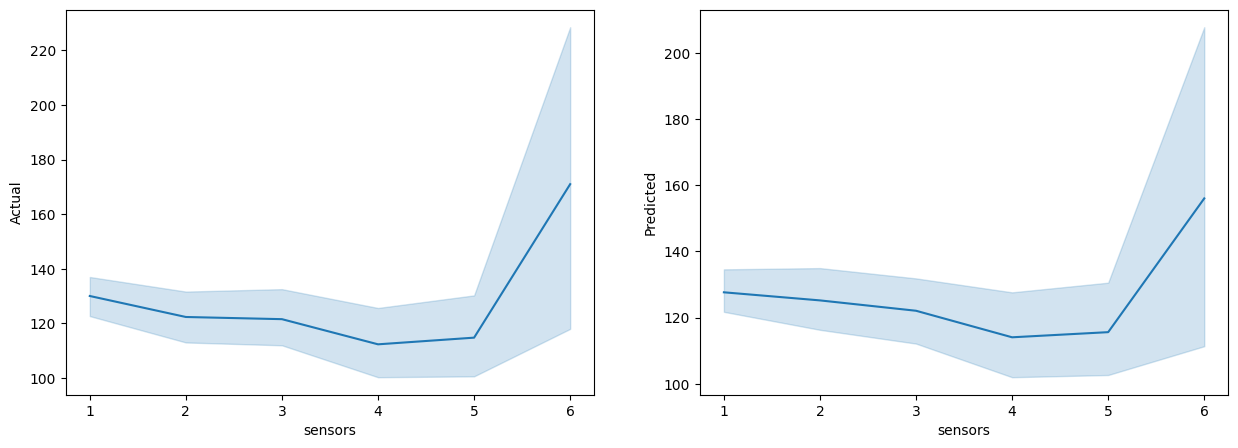

In [171]:
# Actual v/s Predicted(by LR model)by taking one input column(sensors)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x = X_test['sensors'], y =output['Actual'])
plt.subplot(1,2,2)
sns.lineplot(x = X_test['sensors'], y =output['Predicted'])
plt.show()

# Actual vs Predicted is very close

C:\Users\Samsung\AppData\Local\Temp\ipykernel_1900\2017860971.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output['Actual'])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_1900\2017860971.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output['Predicted'])


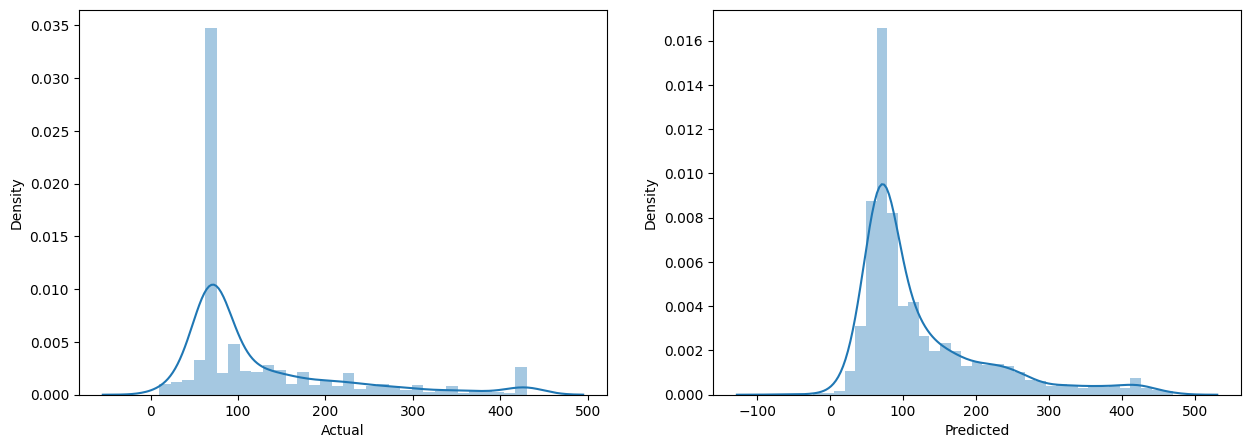

In [172]:
# Data distribution for actual vs predicted output(approx_price_EUR)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(output['Actual'])
plt.subplot(1,2,2)
sns.distplot(output['Predicted'])
plt.show()

# In the below graph both the graphs have nearly the same density i.e. nearly 0.10

In [123]:
import pickle

In [124]:
pickle.dump(pipe1,open('LinearRegModel20.pkl','wb'))